In [1]:
# open excel file sheet "Gesetz + Kommentar" and read column A and B
import pandas as pd
file_path = 'geothermie_gesetz_kommentare.xlsx'
sheet_name = 'Gesetz + Kommentare'
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [2]:
df

,Artikel,Typ,Paragraph,Absatz,Gliederungspunkt_Nr,Gesetzestext_Entwurf_1,Gesetzestext_Entwurf_2,Org_2,Org_3,Org_5,...,Org_24,Org_25,Org_26,Org_27,Org_28,Org_29,Org_30,Org_31,Org_32,Org_33
0,1,Allgemeine Anmerkungen,-1,0,NaN,NaN,NaN,Der Beschleunigungseffekt des GeoBG erscheint ...,Bereits jetzt kommt es jedoch durch den zunehm...,Ein wesentliches Hemmnis für den Bau geothermi...,...,NaN,NaN,NaN,NaN,"Grundsätzlich ist ein Mehr an Geothermie, Sole...",Die Dekarbonisierung der Wärmeversorgung ist e...,s.o. § 1,NaN,NaN,NaN
1,1,Paragraph/Absatz,1,0,NaN,Zweck und Ziel des Gesetzes\nZweck dieses Gese...,Zweck und Ziel des Gesetzes\nZweck dieses Gese...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Paragraph/Absatz,2,0,NaN,Anwendungsbereich\nDieses Gesetz ist anzuwende...,Anwendungsbereich\nDieses Gesetz ist anzuwende...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Paragraph/Absatz,3,0,NaN,Begriffsbestimmungen\nIm Sinne dieses Gesetzes...,Begriffsbestimmungen\nIm Sinne dieses Gesetzes...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Paragraph/Absatz,4,0,NaN,Überragendes öffentliches Interesse\nDie Erric...,Überragendes öffentliches Interesse\nDie Erric...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,Paragraph/Absatz,5,0,NaN,Vorzeitiger Beginn\nFür eine Anlage nach § 2 N...,Vorzeitiger Beginn\nFür eine Anlage nach § 2 N...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,Paragraph/Absatz,6,0,NaN,Maßgabe für § 39 Absatz 1 Nummer 1 und § 44 Ab...,Maßgabe für § 39 Absatz 1 Nummer 1 und § 44 Ab...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,Paragraph/Absatz,6,1,NaN,(1) § 39 Absatz 1 Nummer 1 des Bundesnaturschu...,(1) § 39 Absatz 1 Nummer 1 des Bundesnaturschu...,In diesem Regelungsvorschlag geht es in Absatz...,NaN,NaN,...,NaN,siehe beigefügte Stellungnahme,NaN,NaN,"Es wird beschrieben, dass seismische Explorati...",Die Begründung zu § 4 GeoBG führt explizit bei...,Maßgabe für § 39 Absatz 1 Nummer 1 und § 44 Ab...,Zu § 6 Maßgabe für die Anwendung des Bundesnat...,NaN,NaN
8,1,Paragraph/Absatz,6,2,NaN,(2) § 44 Absatz 1 Nummer 2 des Bundesnaturschu...,(2) § 44 Absatz 1 Nummer 2 des Bundesnaturschu...,Abzulehnen ist aus den bei § 6 Absatz 1 aufgef...,NaN,NaN,...,NaN,siehe beigefügte Stellungnahme,NaN,NaN,NaN,Die Maßgabe zur Anwendung des Bundesnaturschut...,s.o.,NaN,NaN,NaN
9,1,Paragraph/Absatz,7,0,NaN,Duldungspflichten,Duldungspflichten,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# select only columns until "Gesetzestext_Entwurf_2"
df = df.loc[:, :'Gesetzestext_Entwurf_2']

In [3]:
print(df.head(10))

   Artikel                     Typ  Paragraph  Absatz  Gliederungspunkt_Nr  \
0        1  Allgemeine Anmerkungen         -1       0                  NaN   
1        1        Paragraph/Absatz          1       0                  NaN   
2        1        Paragraph/Absatz          2       0                  NaN   
3        1        Paragraph/Absatz          3       0                  NaN   
4        1        Paragraph/Absatz          4       0                  NaN   
5        1        Paragraph/Absatz          5       0                  NaN   
6        1        Paragraph/Absatz          6       0                  NaN   
7        1        Paragraph/Absatz          6       1                  NaN   
8        1        Paragraph/Absatz          6       2                  NaN   
9        1        Paragraph/Absatz          7       0                  NaN   

                              Gesetzestext_Entwurf_1  \
0                                                NaN   
1  Zweck und Ziel des Gesetze

In [5]:
# clean texts by removing "-\n"
df_cleaned = df.replace('-\n', '', regex=True)

# after clean simple "\n"
df_cleaned = df_cleaned.replace('\n', ' ', regex=True)

In [7]:
import pandas as pd
import numpy as np

df = df_cleaned.copy()

# Fill empty with ""
df["t1"] = df["Gesetzestext_Entwurf_1"].fillna("").astype(str).str.strip()
df["t2"] = df["Gesetzestext_Entwurf_2"].fillna("").astype(str).str.strip()

# Build an ID you can read later
def make_id(r):
    art = r["Artikel"]
    par = r["Paragraph"]
    abs_ = r["Absatz"]
    typ = r["Typ"]
    return f"Art{art}_Par{par}_Abs{abs_}_{typ}"

df["chunk_id"] = df.apply(make_id, axis=1)

In [8]:
import re

def tokenize_de(text: str):
    text = text.lower()
    text = re.sub(r"\s+", " ", text)
    # keep § and numbers, remove most punctuation
    text = re.sub(r"[^\w§äöüß0-9 ]", " ", text)
    return [t for t in text.split() if len(t) > 2]

def jaccard(a: str, b: str) -> float:
    A = set(tokenize_de(a))
    B = set(tokenize_de(b))
    if not A and not B:
        return 1.0
    if not A or not B:
        return 0.0
    return len(A & B) / len(A | B)

df["overlap_jaccard_words"] = [jaccard(a, b) for a, b in zip(df["t1"], df["t2"])]
df[["chunk_id", "overlap_jaccard_words"]]

,chunk_id,overlap_jaccard_words
0,Art1_Par-1_Abs0_Allgemeine Anmerkungen,1.000000
1,Art1_Par1_Abs0_Paragraph/Absatz,1.000000
2,Art1_Par2_Abs0_Paragraph/Absatz,0.794872
3,Art1_Par3_Abs0_Paragraph/Absatz,0.793651
4,Art1_Par4_Abs0_Paragraph/Absatz,0.978261
5,Art1_Par5_Abs0_Paragraph/Absatz,0.948718
6,Art1_Par6_Abs0_Paragraph/Absatz,1.000000
7,Art1_Par6_Abs1_Paragraph/Absatz,0.826923
8,Art1_Par6_Abs2_Paragraph/Absatz,0.934783
9,Art1_Par7_Abs0_Paragraph/Absatz,1.000000


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

char_vec = CountVectorizer(analyzer="char_wb", ngram_range=(3, 5))

X = char_vec.fit_transform(pd.concat([df["t1"], df["t2"]], ignore_index=True))
Xa, Xb = X[:len(df)], X[len(df):]

df["overlap_char_ngram_cosine"] = cosine_similarity(Xa, Xb).diagonal()
df[["chunk_id", "overlap_char_ngram_cosine"]]


,chunk_id,overlap_char_ngram_cosine
0,Art1_Par-1_Abs0_Allgemeine Anmerkungen,0.000000
1,Art1_Par1_Abs0_Paragraph/Absatz,1.000000
2,Art1_Par2_Abs0_Paragraph/Absatz,0.943970
3,Art1_Par3_Abs0_Paragraph/Absatz,0.955721
4,Art1_Par4_Abs0_Paragraph/Absatz,0.994088
5,Art1_Par5_Abs0_Paragraph/Absatz,0.964536
6,Art1_Par6_Abs0_Paragraph/Absatz,1.000000
7,Art1_Par6_Abs1_Paragraph/Absatz,0.934002
8,Art1_Par6_Abs2_Paragraph/Absatz,0.968845
9,Art1_Par7_Abs0_Paragraph/Absatz,1.000000


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=2
)

X = tfidf.fit_transform(pd.concat([df["t1"], df["t2"]], ignore_index=True))
Xa, Xb = X[:len(df)], X[len(df):]

df["overlap_tfidf_cosine"] = cosine_similarity(Xa, Xb).diagonal()
df[["chunk_id", "overlap_tfidf_cosine"]]

,chunk_id,overlap_tfidf_cosine
0,Art1_Par-1_Abs0_Allgemeine Anmerkungen,0.000000
1,Art1_Par1_Abs0_Paragraph/Absatz,1.000000
2,Art1_Par2_Abs0_Paragraph/Absatz,0.953454
3,Art1_Par3_Abs0_Paragraph/Absatz,0.944826
4,Art1_Par4_Abs0_Paragraph/Absatz,0.968428
5,Art1_Par5_Abs0_Paragraph/Absatz,0.948530
6,Art1_Par6_Abs0_Paragraph/Absatz,1.000000
7,Art1_Par6_Abs1_Paragraph/Absatz,0.870508
8,Art1_Par6_Abs2_Paragraph/Absatz,0.955527
9,Art1_Par7_Abs0_Paragraph/Absatz,1.000000


In [14]:
df_final = df[["chunk_id", "overlap_jaccard_words", "overlap_char_ngram_cosine", "overlap_tfidf_cosine"]]

In [15]:
df_final

,chunk_id,overlap_jaccard_words,overlap_char_ngram_cosine,overlap_tfidf_cosine
0,Art1_Par-1_Abs0_Allgemeine Anmerkungen,1.000000,0.000000,0.000000
1,Art1_Par1_Abs0_Paragraph/Absatz,1.000000,1.000000,1.000000
2,Art1_Par2_Abs0_Paragraph/Absatz,0.794872,0.943970,0.953454
3,Art1_Par3_Abs0_Paragraph/Absatz,0.793651,0.955721,0.944826
4,Art1_Par4_Abs0_Paragraph/Absatz,0.978261,0.994088,0.968428
5,Art1_Par5_Abs0_Paragraph/Absatz,0.948718,0.964536,0.948530
6,Art1_Par6_Abs0_Paragraph/Absatz,1.000000,1.000000,1.000000
7,Art1_Par6_Abs1_Paragraph/Absatz,0.826923,0.934002,0.870508
8,Art1_Par6_Abs2_Paragraph/Absatz,0.934783,0.968845,0.955527
9,Art1_Par7_Abs0_Paragraph/Absatz,1.000000,1.000000,1.000000


# Embeddings

In [7]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

emb1 = model.encode(df["t1"].tolist(), normalize_embeddings=True, show_progress_bar=True)
emb2 = model.encode(df["t2"].tolist(), normalize_embeddings=True, show_progress_bar=True)


/workspaces/nlp-legislative-consultations/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


In [8]:
row_sim = (emb1 * emb2).sum(axis=1)  # cosine since normalized
df["sim_rowwise"] = row_sim

df[["chunk_id", "Artikel", "Paragraph", "Absatz", "Typ", "sim_rowwise"]].sort_values("sim_rowwise").head(15)


,chunk_id,Artikel,Paragraph,Absatz,Typ,sim_rowwise
34,Art4_Par1_Abs0_Gliederungspunkt,4,1,0,Gliederungspunkt,0.140002
12,Art1_Par8_Abs0_Paragraph/Absatz,1,8,0,Paragraph/Absatz,0.653814
36,Art4_Par3_Abs0_Gliederungspunkt,4,3,0,Gliederungspunkt,0.863750
10,Art1_Par7_Abs1_Paragraph/Absatz,1,7,1,Paragraph/Absatz,0.908496
11,Art1_Par7_Abs2_Paragraph/Absatz,1,7,2,Paragraph/Absatz,0.918162
31,Art3_Par0_Abs0_Volltext,3,0,0,Volltext,0.927598
2,Art1_Par2_Abs0_Paragraph/Absatz,1,2,0,Paragraph/Absatz,0.932878
7,Art1_Par6_Abs1_Paragraph/Absatz,1,6,1,Paragraph/Absatz,0.933632
29,Art1_Par11_Abs6_Paragraph/Absatz,1,11,6,Paragraph/Absatz,0.940894
37,Art4_Par4_Abs0_Gliederungspunkt,4,4,0,Gliederungspunkt,0.951969


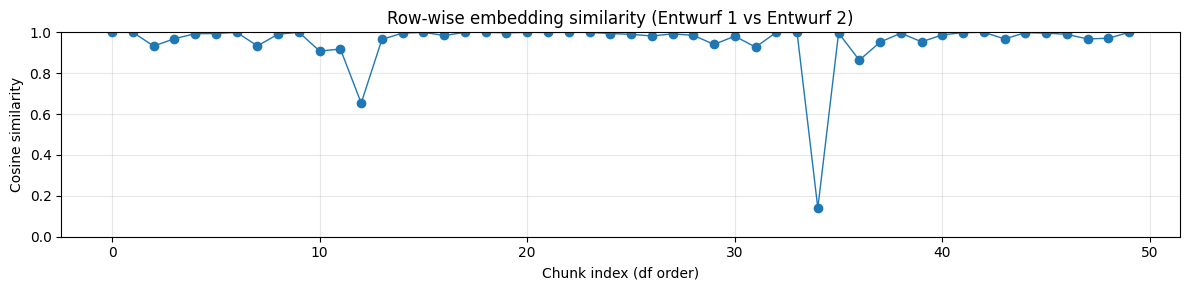

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,3))
plt.plot(df["sim_rowwise"].values, marker="o", linewidth=1)
plt.ylim(0, 1)
plt.title("Row-wise embedding similarity (Entwurf 1 vs Entwurf 2)")
plt.xlabel("Chunk index (df order)")
plt.ylabel("Cosine similarity")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [11]:
sim_all = emb1 @ emb2.T  # (n x n)

best_j = sim_all.argmax(axis=1)
best_score = sim_all.max(axis=1)

df["best_match_row_in_entwurf2"] = best_j
df["best_match_score"] = best_score
df["best_match_chunk_id"] = df.loc[best_j, "chunk_id"].values


In [12]:
df["moved_or_renumbered_hint"] = (df["sim_rowwise"] < 0.70) & (df["best_match_score"] > 0.80)

df.loc[df["moved_or_renumbered_hint"],
       ["chunk_id","sim_rowwise","best_match_chunk_id","best_match_score"]].head(20)


,chunk_id,sim_rowwise,best_match_chunk_id,best_match_score
34,Art4_Par1_Abs0_Gliederungspunkt,0.140002,Art1_Par-1_Abs0_Allgemeine Anmerkungen,1.0


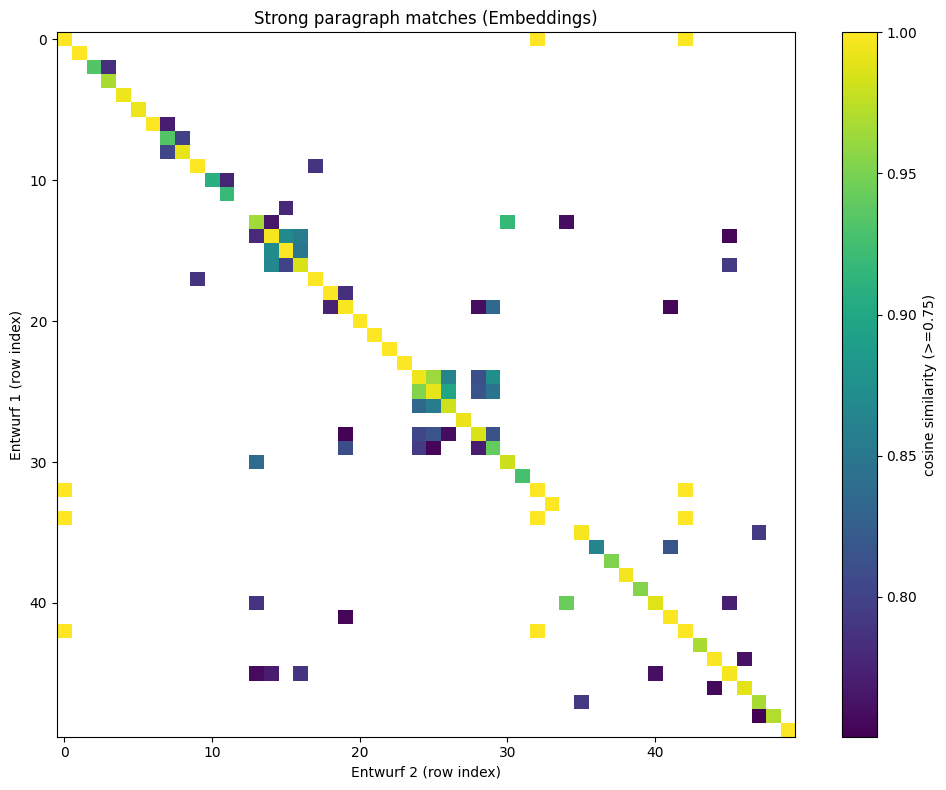

In [13]:
sim_plot = sim_all.copy()
sim_plot[sim_plot < 0.75] = np.nan  # keep only strong matches

plt.figure(figsize=(10,8))
plt.imshow(sim_plot, aspect="auto")
plt.colorbar(label="cosine similarity (>=0.75)")
plt.title("Strong paragraph matches (Embeddings)")
plt.xlabel("Entwurf 2 (row index)")
plt.ylabel("Entwurf 1 (row index)")
plt.tight_layout()
plt.show()


NameError: name 'sim' is not defined

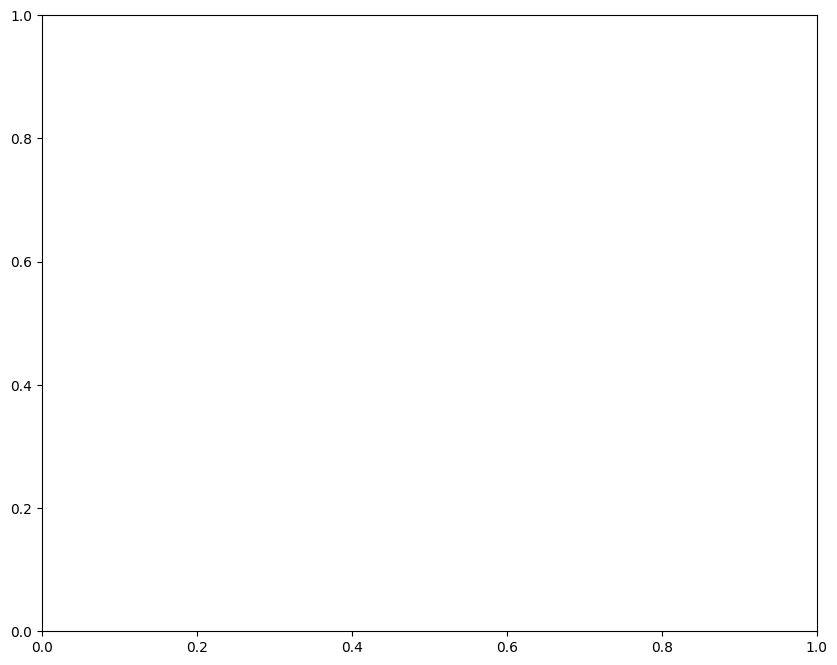

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))

im = ax.imshow(sim, aspect="auto", vmin=0, vmax=1)

# annotate each cell with row,col index or value
n_rows, n_cols = sim.shape
for i in range(n_rows):
    for j in range(n_cols):
        ax.text(
            j, i,
            f"{i}",          # OR f"{sim[i, j]:.2f}"
            ha="center",
            va="center",
            fontsize=6,
            color="white" if sim[i, j] > 0.6 else "black",
        )

ax.set_title("Cosine similarity heatmap (row index inside cells)")
ax.set_xlabel("Entwurf 2 (row index)")
ax.set_ylabel("Entwurf 1 (row index)")
plt.colorbar(im, ax=ax, label="cosine similarity")
plt.tight_layout()
plt.show()


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
texts = [df_cleaned['Gesetzestext_Entwurf_1'][48], df_cleaned['Gesetzestext_Entwurf_2'][48]]
print(texts)

['5. Nach § 49 Absatz 1 Satz 2 werden die folgenden Sätze eingefügt: „Bei der Errichtung, dem Betrieb und der Modernisierung von Erdwärmekollektoren bis zu einer Tiefe von vier Metern und außerhalb von Wasserschutzgebieten ist davon auszugehen, dass die Erdwärmekollektoren keine nachteiligen Auswirkungen auf die Grundwasserbeschaffenheit gemäß Satz 2 haben, wenn sie oder ihre Anlagenteile die Anforderungen nach § 35 Absatz 2 der Verordnung über Anlagen zum Umgang mit wassergefährdenden Stoffen erfüllen. Die Vermutung nach Satz 3 gilt nicht, wenn aufgrund der räumlichen Konzentration der Anlagen in einem Gebiet eine nachteilige thermische Wirkung auf einen Grundwasserkörper oder einen Teil davon zu besorgen ist.“', '5. Nach § 49 Absatz 1 Satz 2 werden die folgenden Sätze eingefügt: „Bei der Errichtung, dem Betrieb und der Modernisierung von Erdwärmekollektoren bis zu einer Tiefe von 4 Metern und außerhalb von Wasserschutzgebieten ist davon auszugehen, dass die Erdwärmekollektoren keine 

In [35]:
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(texts)
print(cosine_similarity(matrix, matrix))

[[1.         0.94239142]
 [0.94239142 1.        ]]


(50, 50)


,B_0,B_1,B_2,B_3,B_4,B_5,B_6,B_7,B_8,B_9,...,B_40,B_41,B_42,B_43,B_44,B_45,B_46,B_47,B_48,B_49
A_0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A_1,0.0,1.000000,0.415314,0.387564,0.300416,0.216139,0.224537,0.166667,0.252262,0.0,...,0.523685,0.269143,0.0,0.047434,0.126958,0.434659,0.449685,0.194225,0.332039,0.149404
A_2,0.0,0.431587,0.941549,0.581801,0.332299,0.139055,0.061285,0.275215,0.365165,0.0,...,0.376285,0.315878,0.0,0.023736,0.136133,0.382988,0.302460,0.179425,0.340211,0.145782
A_3,0.0,0.325363,0.571007,0.948718,0.217882,0.236382,0.093761,0.357261,0.317272,0.0,...,0.424453,0.378373,0.0,0.072627,0.111079,0.361693,0.232488,0.217317,0.310683,0.148690
A_4,0.0,0.330184,0.374878,0.246897,0.990712,0.252901,0.125392,0.286671,0.365271,0.0,...,0.448774,0.318642,0.0,0.038851,0.311960,0.359882,0.469966,0.312045,0.453267,0.229445
A_5,0.0,0.167996,0.147415,0.234526,0.275000,0.960143,0.322749,0.447989,0.242166,0.0,...,0.299089,0.286280,0.0,0.325000,0.172062,0.313748,0.207764,0.165359,0.316667,0.307096
A_6,0.0,0.224537,0.083045,0.125015,0.129099,0.336146,1.000000,0.244949,0.294245,0.0,...,0.216076,0.319642,0.0,0.051640,0.000000,0.432049,0.114442,0.000000,0.103280,0.121988
A_7,0.0,0.170499,0.323705,0.385054,0.301932,0.463275,0.250581,0.932059,0.626723,0.0,...,0.329188,0.313710,0.0,0.366631,0.272124,0.270658,0.358460,0.224163,0.409765,0.336245
A_8,0.0,0.250640,0.400596,0.370054,0.373651,0.250597,0.292353,0.632568,0.980666,0.0,...,0.385696,0.343422,0.0,0.067937,0.311715,0.338332,0.468402,0.256776,0.430265,0.331669
A_9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


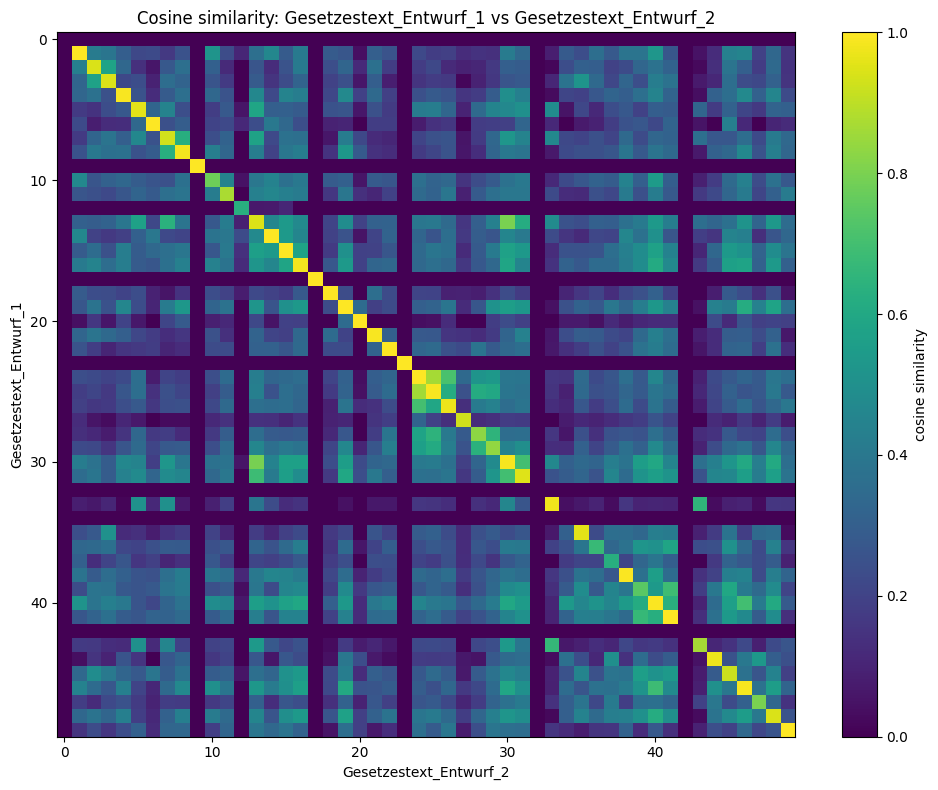

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer  # or TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

col_a = "Gesetzestext_Entwurf_1"
col_b = "Gesetzestext_Entwurf_2"

# 1) Impute empty strings for missing/empty cells
a = df_cleaned[col_a].fillna("").astype(str).tolist()
b = df_cleaned[col_b].fillna("").astype(str).tolist()

# Optional: also treat whitespace-only as empty
a = [t.strip() for t in a]
b = [t.strip() for t in b]

# 2) Build ONE vocabulary across both columns
vectorizer = CountVectorizer()  # consider TfidfVectorizer for better results on long text
X = vectorizer.fit_transform(a + b)

Xa = X[:len(a)]
Xb = X[len(a):]

# 3) Cosine similarity for ALL pairs: (len(a) x len(b))
sim = cosine_similarity(Xa, Xb)

# 4) Put into a DataFrame (nice labels)
sim_df = pd.DataFrame(
    sim,
    index=[f"A_{i}" for i in range(len(a))],
    columns=[f"B_{j}" for j in range(len(b))]
)

print(sim_df.shape)   # (n_rows_in_A, n_rows_in_B)
display(sim_df)       # in notebooks

# 5) Heatmap (matplotlib)
plt.figure(figsize=(10, 8))
plt.imshow(sim_df.values, aspect="auto")
plt.colorbar(label="cosine similarity")
plt.title(f"Cosine similarity: {col_a} vs {col_b}")
plt.xlabel(col_b)
plt.ylabel(col_a)
plt.tight_layout()
plt.show()

In [9]:
!pip install PyMuPDF

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 62.3 MB/s  0:00:006m0:00:01


In [1]:
import pymupdf # imports the pymupdf library
doc = pymupdf.open("Stellungnahme_DUH_eV.pdf") # open a document
law = []
for page in doc: # iterate the document pages
  text = page.get_text() # get plain text encoded as UTF-8
  law.append(text)

In [3]:
law

[' \n \n \nGesetzentwurf der Bundesregierung \nEntwurf eines Gesetzes zur Beschleunigung des Ausbaus von  \nGeothermieanlagen, Wärmepumpen und Wärmespeichern sowie zur  \nÄnderung weiterer rechtlicher Rahmenbedingungen für den  \nklimaneutralen Ausbau der Wärmeversorgung \nBT-Drucksache 21/1928 \nSiehe Anlage \nStellungnahme \nDeutsche Umwelthilfe e. V. \n21. Wahlperiode \nAusschussdrucksache 21(9)102 \n \nAusschuss für Wirtschaft und Energie \n03.11.2025 \n',
 ' \n \n \n \n \n \n \n \n \n \n \n \n \nDeutsche Umwelthilfe e.V. | Hackescher Markt 4 | 10178 Berlin \nBUNDE SGESCHÄF TSSTELLE \nBERLIN \nHackescher Markt 4 \nEingang: Neue Promenade 3 \n10178 Berlin \n \n \nTel. +49 (0) 30 2400867-0 \nFax +49 (0) 30 2400867-19 \nberlin@duh.de \nwww.duh.de \n \n \nDeutsche Umwelthilfe e.V. | Bundesgeschäftsführung: Jürgen Resch, Sascha Müller-Kraenner, Barbara Metz \nVorstand: Prof. Dr. Margit Mönnecke, Michael Rothkegel, Carl-Wilhelm Bodenstein-Dresler | VR: Hannover Nr. 202112 \nGeschäftskont